# Looking at GAMBIT scan outputs

This is a small test notebook for looking a t GAMBIT test outputs. It contains a few examples for how to read `hdf5` files and make plots and is in no way complete!

## Open file with scan results

In [1]:
import h5py
import os

# Open h5py file with scan results
hdf = h5py.File(os.getcwd()+'/runs/WC_lite/samples/WC.hdf5', 'r')

# Print top-level keys
print("Keys: ", list(hdf.keys()))

# Extract dataset with scan data
dataset = hdf['WC']

# Can e.g. loop over keys and print them:
for key in dataset.keys():
    print("Key:", key)
    
# Can extract contents of dataset's entries with:
print(dataset['LogLike'][:])

Keys:  ['WC', 'metadata']
Key: #B2mumu_LogLikelihood_Atlas @FlavBit::HEPLike_B2mumu_LogLikelihood_Atlas
Key: #B2mumu_LogLikelihood_Atlas @FlavBit::HEPLike_B2mumu_LogLikelihood_Atlas_isvalid
Key: #B2mumu_LogLikelihood_CMS @FlavBit::HEPLike_B2mumu_LogLikelihood_CMS
Key: #B2mumu_LogLikelihood_CMS @FlavBit::HEPLike_B2mumu_LogLikelihood_CMS_isvalid
Key: #B2mumu_LogLikelihood_LHCb @FlavBit::HEPLike_B2mumu_LogLikelihood_LHCb
Key: #B2mumu_LogLikelihood_LHCb @FlavBit::HEPLike_B2mumu_LogLikelihood_LHCb_isvalid
Key: #StandardModel_Higgs_parameters @StandardModel_Higgs::primary_parameters::mH
Key: #StandardModel_Higgs_parameters @StandardModel_Higgs::primary_parameters::mH_isvalid
Key: #StandardModel_SLHA2_parameters @StandardModel_SLHA2::primary_parameters::CKM_A
Key: #StandardModel_SLHA2_parameters @StandardModel_SLHA2::primary_parameters::CKM_A_isvalid
Key: #StandardModel_SLHA2_parameters @StandardModel_SLHA2::primary_parameters::CKM_etabar
Key: #StandardModel_SLHA2_parameters @StandardModel_SL

## Extract contents into python dictionary

In [2]:
datadict = {}
for key in dataset.keys():
    datadict[key] = dataset[key][:]
    if "MSSM7" in key:
        print("Key:", key)
        

## Read dict into pandas dataframe:

In [3]:
import pandas as pd

scan = pd.DataFrame(datadict)

scan

,#B2mumu_LogLikelihood_Atlas @FlavBit::HEPLike_B2mumu_LogLikelihood_Atlas,#B2mumu_LogLikelihood_Atlas @FlavBit::HEPLike_B2mumu_LogLikelihood_Atlas_isvalid,#B2mumu_LogLikelihood_CMS @FlavBit::HEPLike_B2mumu_LogLikelihood_CMS,#B2mumu_LogLikelihood_CMS @FlavBit::HEPLike_B2mumu_LogLikelihood_CMS_isvalid,#B2mumu_LogLikelihood_LHCb @FlavBit::HEPLike_B2mumu_LogLikelihood_LHCb,#B2mumu_LogLikelihood_LHCb @FlavBit::HEPLike_B2mumu_LogLikelihood_LHCb_isvalid,#StandardModel_Higgs_parameters @StandardModel_Higgs::primary_parameters::mH,#StandardModel_Higgs_parameters @StandardModel_Higgs::primary_parameters::mH_isvalid,#StandardModel_SLHA2_parameters @StandardModel_SLHA2::primary_parameters::CKM_A,#StandardModel_SLHA2_parameters @StandardModel_SLHA2::primary_parameters::CKM_A_isvalid,...,LogLike,LogLike_isvalid,MPIrank,MPIrank_isvalid,ModifiedLogLike,ModifiedLogLike_isvalid,pointID,pointID_isvalid,scanID,scanID_isvalid
0,-27.698807,1,-44.902319,1,-45.546427,1,125.09,1,0.814,1,...,-119.738739,1,0,1,-119.738739,1,1,1,133053841,1
1,-37.957563,1,-57.710037,1,-47.122478,1,125.09,1,0.814,1,...,-158.092924,1,0,1,-158.092924,1,2,1,133053841,1
2,-0.591055,1,-0.314953,1,-1.744503,1,125.09,1,0.814,1,...,-10.323920,1,0,1,-10.323920,1,3,1,133053841,1
3,-3.188283,1,-4.578417,1,-25.880368,1,125.09,1,0.814,1,...,-42.173662,1,0,1,-42.173662,1,4,1,133053841,1
4,-20.027890,1,-8.924414,1,-30.074185,1,125.09,1,0.814,1,...,-65.594049,1,0,1,-65.594049,1,5,1,133053841,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,-0.851461,1,-0.041472,1,-0.432215,1,125.09,1,0.814,1,...,-1.325430,1,0,1,-1.325430,1,7596,1,133053841,1
7596,-0.875610,1,-0.034082,1,-0.416195,1,125.09,1,0.814,1,...,-1.325892,1,0,1,-1.325892,1,7597,1,133053841,1
7597,-0.851899,1,-0.041338,1,-0.431923,1,125.09,1,0.814,1,...,-1.325235,1,0,1,-1.325235,1,7598,1,133053841,1
7598,-0.849640,1,-0.042033,1,-0.433430,1,125.09,1,0.814,1,...,-1.325146,1,0,1,-1.325146,1,7599,1,133053841,1


From the available keys, we can see that the scan parameters are stored under `#WC_parameters @WC::primary_parameters::...`. Let's look at the part of out dataframe which contains these:

In [4]:
scan.filter(regex='^#WC_parameters @WC::primary_parameters(?!.*_isvalid)')

,#WC_parameters @WC::primary_parameters::Im_DeltaC10,#WC_parameters @WC::primary_parameters::Im_DeltaC7,#WC_parameters @WC::primary_parameters::Im_DeltaC9,#WC_parameters @WC::primary_parameters::Im_DeltaCQ1,#WC_parameters @WC::primary_parameters::Im_DeltaCQ2,#WC_parameters @WC::primary_parameters::Re_DeltaC10,#WC_parameters @WC::primary_parameters::Re_DeltaC7,#WC_parameters @WC::primary_parameters::Re_DeltaC9,#WC_parameters @WC::primary_parameters::Re_DeltaCQ1,#WC_parameters @WC::primary_parameters::Re_DeltaCQ2
0,0.0,0.0,0.0,0.0,0.0,-2.470887,-0.035139,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,-2.529395,0.088759,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.723627,0.063279,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.233892,0.066664,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,-1.927405,0.058579,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7595,0.0,0.0,0.0,0.0,0.0,0.404574,-0.001471,0.0,0.0,0.0
7596,0.0,0.0,0.0,0.0,0.0,0.388371,-0.001831,0.0,0.0,0.0
7597,0.0,0.0,0.0,0.0,0.0,0.404279,-0.001674,0.0,0.0,0.0
7598,0.0,0.0,0.0,0.0,0.0,0.405801,-0.001725,0.0,0.0,0.0


From this we can see that only the two parameters `Re_DeltaC10` and `Re_DeltaC7` actually contribute. Next, we'll make some plots for these. The dataset contains an `_isvalid` column for each parameter. This is necessary to filter out bad points which occured during the scan. Do this with:

In [5]:
validlogs = scan[ scan['LogLike_isvalid'] == 1]

Use these to plot the (maximum) [negative LogLikelihood](https://www.sciencedirect.com/topics/computer-science/negative-log-likelihood#:~:text='Negative%20Log%20Likelihood'%20is%20defined,method%20to%20determine%20model%20parameters.):

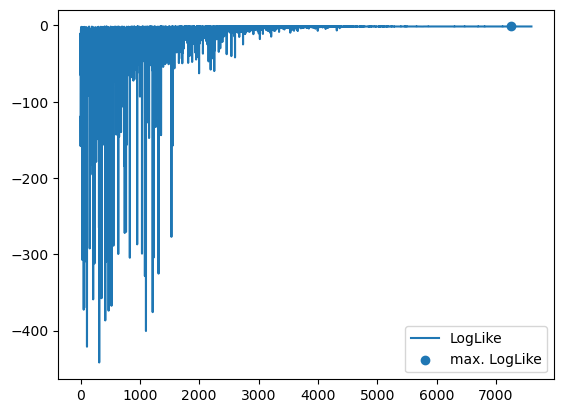

In [6]:
import matplotlib.pyplot as plt

plt.plot(validlogs['LogLike'], label = 'LogLike')
plt.scatter(validlogs['LogLike'].idxmax(), validlogs['LogLike'].max(), label = 'max. LogLike')
plt.legend()

In [7]:
# print the max. LokLike (i.e. best fit point:)
validlogs.loc[ validlogs['LogLike'].idxmax(), "#WC_parameters @WC::primary_parameters::Re_DeltaC10"]

0.40797556197302143

## Compute the profile Likelihood ratio:

The Likelihood is related to the negative Log-Likelihood by: $L(\theta) = \exp{(\mathrm{NLL}(\theta))}$. Thus, the profile likelihood ratio can be computed with: $L(\theta)/L_{\mathrm{max}} = \exp{(\mathrm{NLL}(\theta) - \mathrm{NLL}_\mathrm{max}(\theta))} $

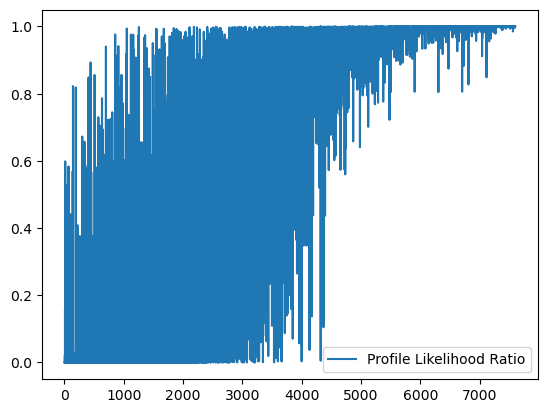

In [8]:
import numpy as np

# Make new column in dataframe:
validlogs['ProfLikeRatio'] = np.exp( (validlogs['LogLike']-validlogs['LogLike'].max()))

# plot:
plt.plot(validlogs['ProfLikeRatio'], label = 'Profile Likelihood Ratio')
plt.legend()

Using this, we can plot a histogram of `Re_DeltaC10` with the best fit point indicated:

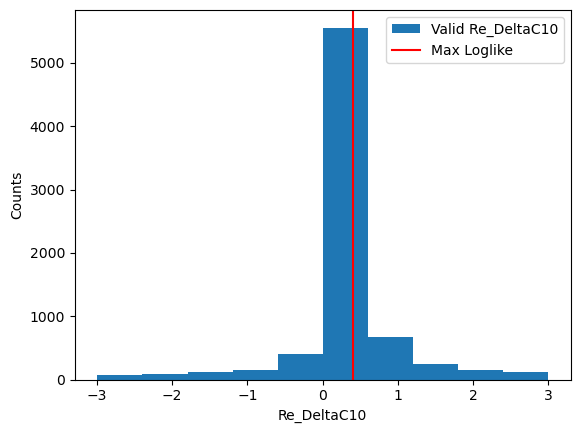

In [9]:
fig, ax = plt.subplots()
ax.hist(validlogs["#WC_parameters @WC::primary_parameters::Re_DeltaC10"], label = 'Valid Re_DeltaC10')
ax.axvline(x=validlogs.loc[ validlogs['ProfLikeRatio'].idxmax(),
                           "#WC_parameters @WC::primary_parameters::Re_DeltaC10"],
                            c='r',
                            label = 'Max Loglike')
ax.set_xlabel('Re_DeltaC10')
ax.set_ylabel('Counts')
ax.legend()

Or we can plot the profile likelihood ratio directly:

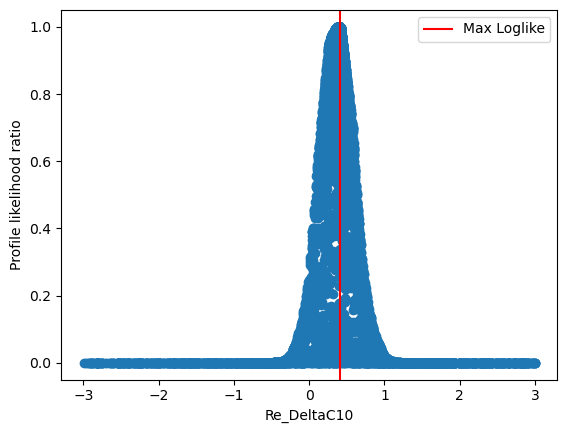

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=validlogs["#WC_parameters @WC::primary_parameters::Re_DeltaC10"],
           y=validlogs["ProfLikeRatio"]
           )
ax.axvline(x=validlogs.loc[ validlogs['ProfLikeRatio'].idxmax(),
                           "#WC_parameters @WC::primary_parameters::Re_DeltaC10"],
                            c='r',
                            label = 'Max Loglike')
ax.set_xlabel('Re_DeltaC10')
ax.set_ylabel('Profile likelihood ratio')
ax.legend()

In this plot, we can see that one value of `Re_DeltaC10` can bring multiple different likelihood values. This is because we are also scanning `Re_DeltaC7`, so we're looking at a 1D projection. Let's plot the profile likelihood for both parameters:

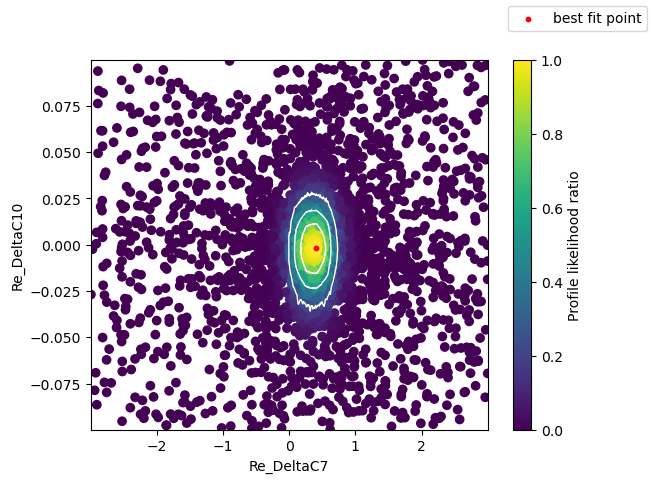

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for contour plot
x = validlogs["#WC_parameters @WC::primary_parameters::Re_DeltaC10"]
y = validlogs["#WC_parameters @WC::primary_parameters::Re_DeltaC7"]
z = validlogs["ProfLikeRatio"]

fig, ax = plt.subplots()

# plot all points
t = ax.scatter(x, y, c=z)
# make contour plot
ax.tricontour(x, y, z, levels=3, linewidths=1., colors='w')
# add marker for best fit point
ax.scatter(x=validlogs.loc[ validlogs['ProfLikeRatio'].idxmax(), "#WC_parameters @WC::primary_parameters::Re_DeltaC10"],
           y=validlogs.loc[ validlogs['ProfLikeRatio'].idxmax(), "#WC_parameters @WC::primary_parameters::Re_DeltaC7"],
           c='r',
           s=10,
           label='best fit point'
           )


ax.set_xlabel('Re_DeltaC7')
ax.set_ylabel('Re_DeltaC10')
fig.colorbar(t, label='Profile likelihood ratio')
fig.legend()